In [1]:
options(jupyter.rich_display = FALSE)

# Basic data science with R

## Reshaping data

Multivariate data can be represented in wide or long format:

- Reshaping a data in wide format into a long format is known as "melting"
- Reshaping a data in long format into a wide format is known as "casting"

Different shapes of data can be utilized for specific purposes

### Melting

A chessboard is in a 8x8 shape

Suppose we have a chessboard with random configuration: Each of the 32 pieces by any player is given a unique number and empty squares are 0:

First create a random vector:

In [2]:
chess_vec <- integer(64)
chess_vec[1:32] <- 1:32
chess_vec_r <- sample(chess_vec)
chess_vec_r

 [1]  0 18 23 22  2  0  0  0  0  0  0  0  0 14  0  0  0  0 30 16  5 25 19  0  0
[26]  0 31  0  3  0 12 11  0 26 20  6 27  0  0 32 15 17  0  0  0  0 24 21  0  0
[51]  0 28  0  9  1  8 13 10  7  4  0 29  0  0

And convert to a matrix:

In [3]:
chess_mat <- matrix(chess_vec_r, nrow = 8)
chess_mat

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8]
[1,]  0    0    0    0    0   15    0   13  
[2,] 18    0    0    0   26   17    0   10  
[3,] 23    0   30   31   20    0    0    7  
[4,] 22    0   16    0    6    0   28    4  
[5,]  2    0    5    3   27    0    0    0  
[6,]  0   14   25    0    0    0    9   29  
[7,]  0    0   19   12    0   24    1    0  
[8,]  0    0    0   11   32   21    8    0  

In [4]:
chess_df <- as.data.frame(chess_mat)
chess_df

  V1 V2 V3 V4 V5 V6 V7 V8
1  0  0  0  0  0 15  0 13
2 18  0  0  0 26 17  0 10
3 23  0 30 31 20  0  0  7
4 22  0 16  0  6  0 28  4
5  2  0  5  3 27  0  0  0
6  0 14 25  0  0  0  9 29
7  0  0 19 12  0 24  1  0
8  0  0  0 11 32 21  8  0

Our task is to create a function to convert this matrix into a format in which we have three columns:
- One for the row index of the original matrix
- One for the column index of the original matrix
- One for the value

We will use the base function reshape()

In [5]:
?reshape

```
reshape(data, varying = NULL, v.names = NULL, timevar = "time",
             idvar = "id", ids = 1:NROW(data),
             times = seq_along(varying[[1]]),
             drop = NULL, direction, new.row.names = NULL,
             sep = ".",
             split = if (sep == "") {
                 list(regexp = "[A-Za-z][0-9]", include = TRUE)
             } else {
                 list(regexp = sep, include = FALSE, fixed = TRUE)}
             )
     
Arguments:

    data: a data frame

 varying: names of sets of variables in the wide format that correspond
          to single variables in long format (‘time-varying’).  This is
          canonically a list of vectors of variable names, but it can
          optionally be a matrix of names, or a single vector of names.
          In each case, the names can be replaced by indices which are
          interpreted as referring to ‘names(data)’.  See ‘Details’ for
          more details and options.

 v.names: names of variables in the long format that correspond to
          multiple variables in the wide format.  See ‘Details’.

 timevar: the variable in long format that differentiates multiple
          records from the same group or individual.  If more than one
          record matches, the first will be taken (with a warning).

   idvar: Names of one or more variables in long format that identify
          multiple records from the same group/individual.  These
          variables may also be present in wide format.

     ids: the values to use for a newly created ‘idvar’ variable in
          long format.

   times: the values to use for a newly created ‘timevar’ variable in
          long format.  See ‘Details’.

    drop: a vector of names of variables to drop before reshaping.

direction: character string, partially matched to either ‘"wide"’ to
          reshape to wide format, or ‘"long"’ to reshape to long
          format.
```

First, let's convert the matrix into a data.frame:

In [6]:
chess_df <- as.data.frame(chess_mat)
chess_df

  V1 V2 V3 V4 V5 V6 V7 V8
1  0  0  0  0  0 15  0 13
2 18  0  0  0 26 17  0 10
3 23  0 30 31 20  0  0  7
4 22  0 16  0  6  0 28  4
5  2  0  5  3 27  0  0  0
6  0 14 25  0  0  0  9 29
7  0  0 19 12  0 24  1  0
8  0  0  0 11 32 21  8  0

- idvar is the variable which need to be left unaltered
- varying are the ones that needs to converted from wide to long
- v.names are the values that should be against the times in the resultant data frame.
- new.row.names is used to assign row names to the resultant dataset
- direction is, to which format the data needs to be transformed

In [7]:
chess_long <- reshape(chess_df,
                      idvar = "rows",
                      varying = 1:8,
                      v.name = "piece",
                      direction = "long")

In [8]:
chess_long

    time piece rows
1.1 1     0    1   
2.1 1    18    2   
3.1 1    23    3   
4.1 1    22    4   
5.1 1     2    5   
6.1 1     0    6   
7.1 1     0    7   
8.1 1     0    8   
1.2 2     0    1   
2.2 2     0    2   
3.2 2     0    3   
4.2 2     0    4   
5.2 2     0    5   
6.2 2    14    6   
7.2 2     0    7   
8.2 2     0    8   
1.3 3     0    1   
2.3 3     0    2   
3.3 3    30    3   
4.3 3    16    4   
5.3 3     5    5   
6.3 3    25    6   
7.3 3    19    7   
8.3 3     0    8   
1.4 4     0    1   
2.4 4     0    2   
3.4 4    31    3   
4.4 4     0    4   
5.4 4     3    5   
6.4 4     0    6   
⋮   ⋮    ⋮     ⋮   
3.5 5    20    3   
4.5 5     6    4   
5.5 5    27    5   
6.5 5     0    6   
7.5 5     0    7   
8.5 5    32    8   
1.6 6    15    1   
2.6 6    17    2   
3.6 6     0    3   
4.6 6     0    4   
5.6 6     0    5   
6.6 6     0    6   
7.6 6    24    7   
8.6 6    21    8   
1.7 7     0    1   
2.7 7     0    2   
3.7 7     0    3   
4.7 7    28    4   


We can change the default name of column "time" to "cols" and rearrange the columns: 

In [9]:
names(chess_long)[1] <- "cols"
chess_long <- chess_long[,c("cols", "rows", "piece")]
chess_long

    cols rows piece
1.1 1    1     0   
2.1 1    2    18   
3.1 1    3    23   
4.1 1    4    22   
5.1 1    5     2   
6.1 1    6     0   
7.1 1    7     0   
8.1 1    8     0   
1.2 2    1     0   
2.2 2    2     0   
3.2 2    3     0   
4.2 2    4     0   
5.2 2    5     0   
6.2 2    6    14   
7.2 2    7     0   
8.2 2    8     0   
1.3 3    1     0   
2.3 3    2     0   
3.3 3    3    30   
4.3 3    4    16   
5.3 3    5     5   
6.3 3    6    25   
7.3 3    7    19   
8.3 3    8     0   
1.4 4    1     0   
2.4 4    2     0   
3.4 4    3    31   
4.4 4    4     0   
5.4 4    5     3   
6.4 4    6     0   
⋮   ⋮    ⋮    ⋮    
3.5 5    3    20   
4.5 5    4     6   
5.5 5    5    27   
6.5 5    6     0   
7.5 5    7     0   
8.5 5    8    32   
1.6 6    1    15   
2.6 6    2    17   
3.6 6    3     0   
4.6 6    4     0   
5.6 6    5     0   
6.6 6    6     0   
7.6 6    7    24   
8.6 6    8    21   
1.7 7    1     0   
2.7 7    2     0   
3.7 7    3     0   
4.7 7    4    28   


### Casting

Now let's convert the long chessboard back to a wide 8x8 one:

- idvar is the variable which need to be left unaltered
- timevar are the variables that needs to converted to wide format
- v.names are the value variable
- direction is, to which format the data needs to be transformed

In [10]:
chess_wide <- reshape(chess_long,
       idvar = "rows",
       v.names = "piece",
       timevar = "cols",
       direction = "wide")

chess_wide

    rows piece.1 piece.2 piece.3 piece.4 piece.5 piece.6 piece.7 piece.8
1.1 1     0       0       0       0       0      15       0      13     
2.1 2    18       0       0       0      26      17       0      10     
3.1 3    23       0      30      31      20       0       0       7     
4.1 4    22       0      16       0       6       0      28       4     
5.1 5     2       0       5       3      27       0       0       0     
6.1 6     0      14      25       0       0       0       9      29     
7.1 7     0       0      19      12       0      24       1       0     
8.1 8     0       0       0      11      32      21       8       0     

We delete the first column, which is unneccessary in our example:

In [11]:
chess_wide <- chess_wide[,-1]
chess_wide

    piece.1 piece.2 piece.3 piece.4 piece.5 piece.6 piece.7 piece.8
1.1  0       0       0       0       0      15       0      13     
2.1 18       0       0       0      26      17       0      10     
3.1 23       0      30      31      20       0       0       7     
4.1 22       0      16       0       6       0      28       4     
5.1  2       0       5       3      27       0       0       0     
6.1  0      14      25       0       0       0       9      29     
7.1  0       0      19      12       0      24       1       0     
8.1  0       0       0      11      32      21       8       0     

and let's compare whether all values are unchanged vis-a-vis the original object:

In [12]:
all(chess_wide == chess_mat)

[1] TRUE

### Real data example: Reshaping IMF WEO database

First read the tsv data into R using read.delim() function (a read.table wrapper for tsv files):

In [13]:
?read.table

In [14]:
#weo <- read.table("data/WEO_Data.xls", sep = "\t", header = T, na.strings = c("n/a", "--", ""), stringsAsFactors = T, dec = ".")
weo <- read.delim("data/WEO_Data.xls", na.strings = c("n/a", "--", ""), stringsAsFactors = T, dec = ".")
#weo <- read.delim("~/Downloads/WEO_Data.xls", na.strings = c("n/a", "--", ""), stringsAsFactors = T, dec = ".")

Let's view the structure of the data:

In [15]:
str(weo)

'data.frame':	8730 obs. of  52 variables:
 $ WEO.Country.Code     : int  512 512 512 512 512 512 512 512 512 512 ...
 $ ISO                  : Factor w/ 194 levels "ABW","AFG","AGO",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ WEO.Subject.Code     : Factor w/ 45 levels "BCA","BCA_NGDPD",..: 25 26 22 27 39 23 30 31 29 28 ...
 $ Country              : Factor w/ 194 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Subject.Descriptor   : Factor w/ 29 levels "Current account balance",..: 14 14 15 15 15 16 12 12 13 13 ...
 $ Units                : Factor w/ 12 levels "Index","National currency",..: 2 5 2 12 11 1 2 10 2 12 ...
 $ Scale                : Factor w/ 3 levels "Billions","Millions",..: 1 NA 1 1 1 NA 3 3 3 3 ...
 $ X1980                : num  NA NA NA NA NA NA NA NA NA NA ...
 $ X1981                : num  NA NA NA NA NA NA NA NA NA NA ...
 $ X1982                : num  NA NA NA NA NA NA NA NA NA NA ...
 $ X1983                : num  NA NA NA NA NA NA NA NA NA NA ...
 $ X1984                : 

Let's get the names and indices of factor variables:

In [16]:
factors <- which(sapply(weo, is.factor))
factors

               ISO   WEO.Subject.Code            Country Subject.Descriptor 
                 2                  3                  4                  5 
             Units              Scale 
                 6                  7 

And get the unique values (or levels) of each of these factor variables:

In [17]:
lapply(weo[, factors], levels)

$ISO
  [1] "ABW" "AFG" "AGO" "ALB" "ARE" "ARG" "ARM" "ATG" "AUS" "AUT" "AZE" "BDI"
 [13] "BEL" "BEN" "BFA" "BGD" "BGR" "BHR" "BHS" "BIH" "BLR" "BLZ" "BOL" "BRA"
 [25] "BRB" "BRN" "BTN" "BWA" "CAF" "CAN" "CHE" "CHL" "CHN" "CIV" "CMR" "COD"
 [37] "COG" "COL" "COM" "CPV" "CRI" "CYP" "CZE" "DEU" "DJI" "DMA" "DNK" "DOM"
 [49] "DZA" "ECU" "EGY" "ERI" "ESP" "EST" "ETH" "FIN" "FJI" "FRA" "FSM" "GAB"
 [61] "GBR" "GEO" "GHA" "GIN" "GMB" "GNB" "GNQ" "GRC" "GRD" "GTM" "GUY" "HKG"
 [73] "HND" "HRV" "HTI" "HUN" "IDN" "IND" "IRL" "IRN" "IRQ" "ISL" "ISR" "ITA"
 [85] "JAM" "JOR" "JPN" "KAZ" "KEN" "KGZ" "KHM" "KIR" "KNA" "KOR" "KWT" "LAO"
 [97] "LBN" "LBR" "LBY" "LCA" "LKA" "LSO" "LTU" "LUX" "LVA" "MAC" "MAR" "MDA"
[109] "MDG" "MDV" "MEX" "MHL" "MKD" "MLI" "MLT" "MMR" "MNE" "MNG" "MOZ" "MRT"
[121] "MUS" "MWI" "MYS" "NAM" "NER" "NGA" "NIC" "NLD" "NOR" "NPL" "NRU" "NZL"
[133] "OMN" "PAK" "PAN" "PER" "PHL" "PLW" "PNG" "POL" "PRI" "PRT" "PRY" "QAT"
[145] "ROU" "RUS" "RWA" "SAU" "SDN" "SEN" "SGP" "SLB" "SLE"

#### Melting GDP per capita (PPP)

Now we are concerned with only the NGDPRPPPPC series "Purchasing power parity; 2011 international dollar"

So we filter the dataset:

In [18]:
weo_ppp <- weo[weo$WEO.Subject.Code == "NGDPRPPPPC",]

In [19]:
str(weo_ppp)

'data.frame':	194 obs. of  52 variables:
 $ WEO.Country.Code     : int  512 914 612 614 311 213 911 314 193 122 ...
 $ ISO                  : Factor w/ 194 levels "ABW","AFG","AGO",..: 2 4 49 3 8 6 7 1 9 10 ...
 $ WEO.Subject.Code     : Factor w/ 45 levels "BCA","BCA_NGDPD",..: 31 31 31 31 31 31 31 31 31 31 ...
 $ Country              : Factor w/ 194 levels "Afghanistan",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Subject.Descriptor   : Factor w/ 29 levels "Current account balance",..: 12 12 12 12 12 12 12 12 12 12 ...
 $ Units                : Factor w/ 12 levels "Index","National currency",..: 10 10 10 10 10 10 10 10 10 10 ...
 $ Scale                : Factor w/ 3 levels "Billions","Millions",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ X1980                : num  NA 4675 10804 5277 9082 ...
 $ X1981                : num  NA 4845 10793 4912 9503 ...
 $ X1982                : num  NA 4882 11127 4785 9605 ...
 $ X1983                : num  NA 4837 11355 4859 10268 ...
 $ X1984                : num  NA 4834 1161

Now we want a long DF of four columns: Country names, country codes, years and per capita gdp in ppp values 

In [20]:
names(weo_ppp)

 [1] "WEO.Country.Code"      "ISO"                   "WEO.Subject.Code"     
 [4] "Country"               "Subject.Descriptor"    "Units"                
 [7] "Scale"                 "X1980"                 "X1981"                
[10] "X1982"                 "X1983"                 "X1984"                
[13] "X1985"                 "X1986"                 "X1987"                
[16] "X1988"                 "X1989"                 "X1990"                
[19] "X1991"                 "X1992"                 "X1993"                
[22] "X1994"                 "X1995"                 "X1996"                
[25] "X1997"                 "X1998"                 "X1999"                
[28] "X2000"                 "X2001"                 "X2002"                
[31] "X2003"                 "X2004"                 "X2005"                
[34] "X2006"                 "X2007"                 "X2008"                
[37] "X2009"                 "X2010"                 "X2011"                

In [21]:
cols <- sprintf("X%s", 1980:2023)
cols

 [1] "X1980" "X1981" "X1982" "X1983" "X1984" "X1985" "X1986" "X1987" "X1988"
[10] "X1989" "X1990" "X1991" "X1992" "X1993" "X1994" "X1995" "X1996" "X1997"
[19] "X1998" "X1999" "X2000" "X2001" "X2002" "X2003" "X2004" "X2005" "X2006"
[28] "X2007" "X2008" "X2009" "X2010" "X2011" "X2012" "X2013" "X2014" "X2015"
[37] "X2016" "X2017" "X2018" "X2019" "X2020" "X2021" "X2022" "X2023"

In [22]:
weo_ppp_long <- reshape(weo_ppp,
                      idvar = c("WEO.Country.Code", "Country"),
                      varying = cols,
                        times = cols,
                      v.name = "NGDPRPPPPC",
                      direction = "long")

In [23]:
str(weo_ppp_long)

'data.frame':	8536 obs. of  10 variables:
 $ WEO.Country.Code     : int  512 914 612 614 311 213 911 314 193 122 ...
 $ ISO                  : Factor w/ 194 levels "ABW","AFG","AGO",..: 2 4 49 3 8 6 7 1 9 10 ...
 $ WEO.Subject.Code     : Factor w/ 45 levels "BCA","BCA_NGDPD",..: 31 31 31 31 31 31 31 31 31 31 ...
 $ Country              : Factor w/ 194 levels "Afghanistan",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Subject.Descriptor   : Factor w/ 29 levels "Current account balance",..: 12 12 12 12 12 12 12 12 12 12 ...
 $ Units                : Factor w/ 12 levels "Index","National currency",..: 10 10 10 10 10 10 10 10 10 10 ...
 $ Scale                : Factor w/ 3 levels "Billions","Millions",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Estimates.Start.After: int  2016 2011 2017 2015 2011 2016 2014 2017 2017 2017 ...
 $ time                 : chr  "X1980" "X1980" "X1980" "X1980" ...
 $ NGDPRPPPPC           : num  NA 4675 10804 5277 9082 ...
 - attr(*, "reshapeLong")=List of 4
  ..$ varying:List of 1
  .. ..$

We can clear rownames:

In [24]:
rownames(weo_ppp_long) <- NULL

In [25]:
weo_ppp_long_2 <- weo_ppp_long[,c("Country", "WEO.Country.Code", "ISO", "time", "NGDPRPPPPC")]
weo_ppp_long_2

     Country                  WEO.Country.Code ISO time  NGDPRPPPPC
1    Afghanistan              512              AFG X1980        NA 
2    Albania                  914              ALB X1980  4674.883 
3    Algeria                  612              DZA X1980 10804.443 
4    Angola                   614              AGO X1980  5276.667 
5    Antigua and Barbuda      311              ATG X1980  9081.960 
6    Argentina                213              ARG X1980 14709.172 
7    Armenia                  911              ARM X1980        NA 
8    Aruba                    314              ABW X1980        NA 
9    Australia                193              AUS X1980 24398.012 
10   Austria                  122              AUT X1980 26129.809 
11   Azerbaijan               912              AZE X1980        NA 
12   The Bahamas              313              BHS X1980 27652.318 
13   Bahrain                  419              BHR X1980 40934.983 
14   Bangladesh               513              B

We can convert year values from X1980 to 1980 and make them numeric:

In [26]:
weo_ppp_long_2$time <- as.integer(gsub("X", "", weo_ppp_long_2$time))
weo_ppp_long_2

     Country                  WEO.Country.Code ISO time NGDPRPPPPC
1    Afghanistan              512              AFG 1980        NA 
2    Albania                  914              ALB 1980  4674.883 
3    Algeria                  612              DZA 1980 10804.443 
4    Angola                   614              AGO 1980  5276.667 
5    Antigua and Barbuda      311              ATG 1980  9081.960 
6    Argentina                213              ARG 1980 14709.172 
7    Armenia                  911              ARM 1980        NA 
8    Aruba                    314              ABW 1980        NA 
9    Australia                193              AUS 1980 24398.012 
10   Austria                  122              AUT 1980 26129.809 
11   Azerbaijan               912              AZE 1980        NA 
12   The Bahamas              313              BHS 1980 27652.318 
13   Bahrain                  419              BHR 1980 40934.983 
14   Bangladesh               513              BGD 1980  1159.

#### Casting 2016 data

Now let's select only a single year, e.g 2016 and create a wide matrix of subjects on the columns and countries on the rows:

In [27]:
names(weo_ppp)

 [1] "WEO.Country.Code"      "ISO"                   "WEO.Subject.Code"     
 [4] "Country"               "Subject.Descriptor"    "Units"                
 [7] "Scale"                 "X1980"                 "X1981"                
[10] "X1982"                 "X1983"                 "X1984"                
[13] "X1985"                 "X1986"                 "X1987"                
[16] "X1988"                 "X1989"                 "X1990"                
[19] "X1991"                 "X1992"                 "X1993"                
[22] "X1994"                 "X1995"                 "X1996"                
[25] "X1997"                 "X1998"                 "X1999"                
[28] "X2000"                 "X2001"                 "X2002"                
[31] "X2003"                 "X2004"                 "X2005"                
[34] "X2006"                 "X2007"                 "X2008"                
[37] "X2009"                 "X2010"                 "X2011"                

In [28]:
weo_2016 <- weo[,c(names(weo_ppp)[1:7], "X2016")]

In [29]:
str(weo_2016)

'data.frame':	8730 obs. of  8 variables:
 $ WEO.Country.Code  : int  512 512 512 512 512 512 512 512 512 512 ...
 $ ISO               : Factor w/ 194 levels "ABW","AFG","AGO",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ WEO.Subject.Code  : Factor w/ 45 levels "BCA","BCA_NGDPD",..: 25 26 22 27 39 23 30 31 29 28 ...
 $ Country           : Factor w/ 194 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Subject.Descriptor: Factor w/ 29 levels "Current account balance",..: 14 14 15 15 15 16 12 12 13 13 ...
 $ Units             : Factor w/ 12 levels "Index","National currency",..: 2 5 2 12 11 1 2 10 2 12 ...
 $ Scale             : Factor w/ 3 levels "Billions","Millions",..: 1 NA 1 1 1 NA 3 3 3 3 ...
 $ X2016             : num  493.07 2.16 1318.48 19.43 66.38 ...


In [30]:
?reshape

In [31]:
weo_2016_wide <- reshape(weo_2016,
                      idvar = c("WEO.Country.Code", "Country"),
                      v.names = "X2016",
                      timevar = "WEO.Subject.Code",
                      drop = c("Subject.Descriptor", "Units", "Scale"),
                      direction = "wide")

In [32]:
str(weo_2016_wide)

'data.frame':	194 obs. of  48 variables:
 $ WEO.Country.Code  : int  512 914 612 614 311 213 911 314 193 122 ...
 $ ISO               : Factor w/ 194 levels "ABW","AFG","AGO",..: 2 4 49 3 8 6 7 1 9 10 ...
 $ Country           : Factor w/ 194 levels "Afghanistan",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ X2016.NGDP_R      : num  493.07 760.32 7270.16 1588.96 3.25 ...
 $ X2016.NGDP_RPCH   : num  2.16 3.35 3.2 -2.58 5.35 ...
 $ X2016.NGDP        : num  1318.48 1475.25 17525.1 16549.56 3.94 ...
 $ X2016.NGDPD       : num  19.43 11.88 160.13 101.12 1.46 ...
 $ X2016.PPPGDP      : num  66.38 34.03 609.7 194.89 2.29 ...
 $ X2016.NGDP_D      : num  267 194 241 1042 121 ...
 $ X2016.NGDPRPC     : num  14228 264357 178355 57774 35967 ...
 $ X2016.NGDPRPPPPC  : num  1774 10958 13854 6563 23504 ...
 $ X2016.NGDPPC      : num  38045 512934 429934 601737 43674 ...
 $ X2016.NGDPDPC     : num  561 4132 3928 3677 16176 ...
 $ X2016.PPPPC       : num  1916 11831 14958 7086 25376 ...
 $ X2016.NGAP_NPGDP  : num  NA

In [33]:
weo_2016_wide

     WEO.Country.Code ISO Country                  X2016.NGDP_R X2016.NGDP_RPCH
1    512              AFG Afghanistan                493.073     2.164         
46   914              ALB Albania                    760.317     3.352         
91   612              DZA Algeria                   7270.163     3.200         
136  614              AGO Angola                    1588.961    -2.580         
181  311              ATG Antigua and Barbuda          3.247     5.348         
226  213              ARG Argentina                  708.338    -1.823         
271  911              ARM Armenia                   3367.848     0.261         
316  314              ABW Aruba                        3.310    -0.124         
361  193              AUS Australia                 1678.081     2.606         
406  122              AUT Austria                    317.149     1.451         
451  912              AZE Azerbaijan                  28.464    -3.100         
496  313              BHS The Bahamas   

We may have to correct column names:

In [34]:
names_2016 <- names(weo_2016_wide)
names_2016

 [1] "WEO.Country.Code"   "ISO"                "Country"           
 [4] "X2016.NGDP_R"       "X2016.NGDP_RPCH"    "X2016.NGDP"        
 [7] "X2016.NGDPD"        "X2016.PPPGDP"       "X2016.NGDP_D"      
[10] "X2016.NGDPRPC"      "X2016.NGDPRPPPPC"   "X2016.NGDPPC"      
[13] "X2016.NGDPDPC"      "X2016.PPPPC"        "X2016.NGAP_NPGDP"  
[16] "X2016.PPPSH"        "X2016.PPPEX"        "X2016.NID_NGDP"    
[19] "X2016.NGSD_NGDP"    "X2016.PCPI"         "X2016.PCPIPCH"     
[22] "X2016.PCPIE"        "X2016.PCPIEPCH"     "X2016.FLIBOR6"     
[25] "X2016.TM_RPCH"      "X2016.TMG_RPCH"     "X2016.TX_RPCH"     
[28] "X2016.TXG_RPCH"     "X2016.LUR"          "X2016.LE"          
[31] "X2016.LP"           "X2016.GGR"          "X2016.GGR_NGDP"    
[34] "X2016.GGX"          "X2016.GGX_NGDP"     "X2016.GGXCNL"      
[37] "X2016.GGXCNL_NGDP"  "X2016.GGSB"         "X2016.GGSB_NPGDP"  
[40] "X2016.GGXONLB"      "X2016.GGXONLB_NGDP" "X2016.GGXWDN"      
[43] "X2016.GGXWDN_NGDP"  "X2016.GGXWDG"       "

In [35]:
names(weo_2016_wide) <- gsub("X2016\\.", "", names_2016)

In [36]:
str(weo_2016_wide)

'data.frame':	194 obs. of  48 variables:
 $ WEO.Country.Code: int  512 914 612 614 311 213 911 314 193 122 ...
 $ ISO             : Factor w/ 194 levels "ABW","AFG","AGO",..: 2 4 49 3 8 6 7 1 9 10 ...
 $ Country         : Factor w/ 194 levels "Afghanistan",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ NGDP_R          : num  493.07 760.32 7270.16 1588.96 3.25 ...
 $ NGDP_RPCH       : num  2.16 3.35 3.2 -2.58 5.35 ...
 $ NGDP            : num  1318.48 1475.25 17525.1 16549.56 3.94 ...
 $ NGDPD           : num  19.43 11.88 160.13 101.12 1.46 ...
 $ PPPGDP          : num  66.38 34.03 609.7 194.89 2.29 ...
 $ NGDP_D          : num  267 194 241 1042 121 ...
 $ NGDPRPC         : num  14228 264357 178355 57774 35967 ...
 $ NGDPRPPPPC      : num  1774 10958 13854 6563 23504 ...
 $ NGDPPC          : num  38045 512934 429934 601737 43674 ...
 $ NGDPDPC         : num  561 4132 3928 3677 16176 ...
 $ PPPPC           : num  1916 11831 14958 7086 25376 ...
 $ NGAP_NPGDP      : num  NA NA NA NA NA ...
 $ PPPSH     

### Extension packages

reshape2, tidy2 (from tidyverse) and data.table packages provide extended functionality on reshaping datasets

## Discretize numeric data

Now we may want to create factors on GDP per capita (PPP): Low income, middle income and high income countries  

Let's say the cutting points are 3000 and 12000

In [37]:
str(weo_ppp_long_2)

'data.frame':	8536 obs. of  5 variables:
 $ Country         : Factor w/ 194 levels "Afghanistan",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ WEO.Country.Code: int  512 914 612 614 311 213 911 314 193 122 ...
 $ ISO             : Factor w/ 194 levels "ABW","AFG","AGO",..: 2 4 49 3 8 6 7 1 9 10 ...
 $ time            : int  1980 1980 1980 1980 1980 1980 1980 1980 1980 1980 ...
 $ NGDPRPPPPC      : num  NA 4675 10804 5277 9082 ...


We will discretize the NGDPRPPPPC column with cut() function and add the results as a new factor variable:

In [38]:
max(weo_ppp_long_2$NGDPRPPPPC, na.rm = T)

[1] 172994.5

In [39]:
weo_ppp_long_2$income_levels <- cut(weo_ppp_long_2$NGDPRPPPPC,
                                    breaks = c(0, 5000, 20000, max(weo_ppp_long_2$NGDPRPPPPC, na.rm = T)),
                                    labels = c("L", "M", "H"))

In [79]:
weo_ppp_long_2[,3:6]

     ISO time NGDPRPPPPC income_levels
1    AFG 1980        NA  NA           
2    ALB 1980  4674.883  L            
3    DZA 1980 10804.443  M            
4    AGO 1980  5276.667  M            
5    ATG 1980  9081.960  M            
6    ARG 1980 14709.172  M            
7    ARM 1980        NA  NA           
8    ABW 1980        NA  NA           
9    AUS 1980 24398.012  H            
10   AUT 1980 26129.809  H            
11   AZE 1980        NA  NA           
12   BHS 1980 27652.318  H            
13   BHR 1980 40934.983  H            
14   BGD 1980  1159.722  L            
15   BRB 1980 14066.335  M            
16   BLR 1980        NA  NA           
17   BEL 1980 25189.821  H            
18   BLZ 1980  3183.026  L            
19   BEN 1980  1724.655  L            
20   BTN 1980  1102.657  L            
21   BOL 1980  4866.147  L            
22   BIH 1980        NA  NA           
23   BWA 1980  4265.308  L            
24   BRA 1980 11373.057  M            
25   BRN 1980        NA  

In [80]:
weo_ppp_long_2

     Country                  WEO.Country.Code ISO time NGDPRPPPPC
1    Afghanistan              512              AFG 1980        NA 
2    Albania                  914              ALB 1980  4674.883 
3    Algeria                  612              DZA 1980 10804.443 
4    Angola                   614              AGO 1980  5276.667 
5    Antigua and Barbuda      311              ATG 1980  9081.960 
6    Argentina                213              ARG 1980 14709.172 
7    Armenia                  911              ARM 1980        NA 
8    Aruba                    314              ABW 1980        NA 
9    Australia                193              AUS 1980 24398.012 
10   Austria                  122              AUT 1980 26129.809 
11   Azerbaijan               912              AZE 1980        NA 
12   The Bahamas              313              BHS 1980 27652.318 
13   Bahrain                  419              BHR 1980 40934.983 
14   Bangladesh               513              BGD 1980  1159.

In [81]:
save(weo_ppp_long_2, file = "weo_ppp_long_2.RData")

classInt package offers alternative methods for discretizing numeric values

## Joining data

Now let's import a second IMF dataset: 2016 values of international investment position of all countries

In [41]:
iip <- read.csv("data/Data_in_US_Dollars.csv")

In [42]:
str(iip)

'data.frame':	208 obs. of  13 variables:
 $ WEO.Country.Code                                                        : int  512 914 612 614 312 311 213 911 314 193 ...
 $ Assets                                                                  : num  9274 7352 127904 87718 1511 ...
 $ Direct.investment                                                       : num  5.61 1406.26 1281.88 21493.93 71.64 ...
 $ Portfolio.investment                                                    : num  351.4 748.4 NA 7401.8 42.2 ...
 $ Financial.derivatives..other.than.reserves..and.employee.stock.options  : num  NA NA NA 78.2 0 ...
 $ Other.investment                                                        : num  1454 2093 5414 34392 1342 ...
 $ Reserve.assets                                                          : num  7462.8 3105 121208.4 24352.5 55.6 ...
 $ Liabilities                                                             : num  3843 12439 33264 90246 1897 ...
 $ Direct.investment.1              

Now similar to SQL joins, we will "merge" the weo_2016_wide and iip datasets using common "WEO.Country.Code" variable:

In [43]:
?merge

```
merge(x, y, by = intersect(names(x), names(y)),
           by.x = by, by.y = by, all = FALSE, all.x = all, all.y = all,
           sort = TRUE, suffixes = c(".x",".y"), no.dups = TRUE,
           incomparables = NULL, ...)
     
Arguments:

    x, y: data frames, or objects to be coerced to one.

by, by.x, by.y: specifications of the columns used for merging.  See
          ‘Details’.

     all: logical; ‘all = L’ is shorthand for ‘all.x = L’ and ‘all.y =
          L’, where ‘L’ is either ‘TRUE’ or ‘FALSE’.

   all.x: logical; if ‘TRUE’, then extra rows will be added to the
          output, one for each row in ‘x’ that has no matching row in
          ‘y’.  These rows will have ‘NA’s in those columns that are
          usually filled with values from ‘y’.  The default is ‘FALSE’,
          so that only rows with data from both ‘x’ and ‘y’ are
          included in the output.

   all.y: logical; analogous to ‘all.x’.

```

In [44]:
nrow(weo_2016_wide)
nrow(iip)

[1] 194

[1] 208

As we see iip table has more rows

Let's see the rows that are common, that only weo_2016_wide have or that only iip have:

In [45]:
codes_weo <- weo_2016_wide$WEO.Country.Code
codes_iip <- iip$WEO.Country.Code

In [46]:
codes_L <- setdiff(codes_weo, codes_iip)
length(codes_L)

[1] 5

In [47]:
codes_R <- setdiff(codes_iip, codes_weo)
length(codes_R)

[1] 19

In [48]:
codes_I <- intersect(codes_iip, codes_weo)
length(codes_I)

[1] 189

In [49]:
codes_O <- union(codes_iip, codes_weo)
length(codes_O)

[1] 213

So in a total of 213 country codes, 5 are unique to weo, 19 are unique to iip and 189 are common across

### Left Join

First we make a "left join": We keep the country codes that weo have and do not add the codes unique to iip

In [50]:
weo_iip_2016_L <- merge(x = weo_2016_wide,
                        y = iip,
                        by = "WEO.Country.Code",
                       all.x = T)

In [51]:
str(weo_iip_2016_L)

'data.frame':	194 obs. of  60 variables:
 $ WEO.Country.Code                                                        : int  111 112 122 124 128 132 134 135 136 137 ...
 $ ISO                                                                     : Factor w/ 194 levels "ABW","AFG","AGO",..: 183 61 10 13 47 58 44 155 84 104 ...
 $ Country                                                                 : Factor w/ 194 levels "Afghanistan",..: 186 185 10 16 44 58 62 145 81 99 ...
 $ NGDP_R                                                                  : num  17659 1970 317 416 1954 ...
 $ NGDP_RPCH                                                               : num  1.57 1.79 1.45 1.41 1.97 ...
 $ NGDP                                                                    : num  18707 1970 353 423 2066 ...
 $ NGDPD                                                                   : num  18707 2669 391 468 307 ...
 $ PPPGDP                                                                  : num  1

12 new variables are added from iip, and number of rows is equal to that of weo_2016_wide

Now let's select those rows where codes are unique to weo:

In [52]:
weo_iip_2016_L[weo_iip_2016_L$WEO.Country.Code %in% codes_L,]

    WEO.Country.Code ISO Country              NGDP_R   NGDP_RPCH NGDP      
8   135              SMR San Marino              1.232  2.197         1.414
56  359              PRI Puerto Rico            10.188 -1.327       103.961
74  466              ARE United Arab Emirates 1411.057  2.988      1311.248
156 836              NRU Nauru                   0.110 10.404         0.140
178 927              UZB Uzbekistan           1135.699  7.800    199993.374
    NGDPD   PPPGDP  NGDP_D    NGDPRPC    ⋯ Portfolio.investment
8     1.565   1.989   114.838  35938.601 ⋯ NA                  
56  103.961 130.667  1020.464   2986.421 ⋯ NA                  
74  357.045 677.602    92.927 143167.553 ⋯ NA                  
156   0.102   0.151   126.943   8461.676 ⋯ NA                  
178  67.069 207.855 17609.713  35968.304 ⋯ NA                  
    Financial.derivatives..other.than.reserves..and.employee.stock.options
8   NA                                                                    
56  NA    

As those rows do not appear in iip, they are shown as NA in columns imported from iip

### Right Join

We now take the codes in iip as a basis:

In [53]:
weo_iip_2016_R <- merge(x = weo_2016_wide,
                        y = iip,
                        by = "WEO.Country.Code",
                       all.y = T)

In [54]:
str(weo_iip_2016_R)

'data.frame':	208 obs. of  60 variables:
 $ WEO.Country.Code                                                        : int  111 112 122 124 126 128 132 134 136 137 ...
 $ ISO                                                                     : Factor w/ 194 levels "ABW","AFG","AGO",..: 183 61 10 13 NA 47 58 44 84 104 ...
 $ Country                                                                 : Factor w/ 194 levels "Afghanistan",..: 186 185 10 16 NA 44 58 62 81 99 ...
 $ NGDP_R                                                                  : num  17659 1970 317 416 NA ...
 $ NGDP_RPCH                                                               : num  1.57 1.79 1.45 1.41 NA ...
 $ NGDP                                                                    : num  18707 1970 353 423 NA ...
 $ NGDPD                                                                   : num  18707 2669 391 468 NA ...
 $ PPPGDP                                                                  : num  18707 2824

Number of rows is equal to that of iip

In [55]:
weo_iip_2016_R[weo_iip_2016_R$WEO.Country.Code %in% codes_R,]

    WEO.Country.Code ISO Country NGDP_R NGDP_RPCH NGDP NGDPD PPPGDP NGDP_D
5   126              NA  NA      NA     NA        NA   NA    NA     NA    
17  163              NA  NA      NA     NA        NA   NA    NA     NA    
26  188              NA  NA      NA     NA        NA   NA    NA     NA    
49  309              NA  NA      NA     NA        NA   NA    NA     NA    
51  312              NA  NA      NA     NA        NA   NA    NA     NA    
55  319              NA  NA      NA     NA        NA   NA    NA     NA    
61  351              NA  NA      NA     NA        NA   NA    NA     NA    
62  352              NA  NA      NA     NA        NA   NA    NA     NA    
63  353              NA  NA      NA     NA        NA   NA    NA     NA    
64  354              NA  NA      NA     NA        NA   NA    NA     NA    
65  355              NA  NA      NA     NA        NA   NA    NA     NA    
71  381              NA  NA      NA     NA        NA   NA    NA     NA    
83  459              NA  

When we filter the rows for the codes unique to iip, all values in the columns inherited from weo have only NA values

### Inner Join

Now we only select those codes common to both:

In [56]:
weo_iip_2016_I <- merge(x = weo_2016_wide,
                        y = iip,
                        by = "WEO.Country.Code",
                       all = F)

In [57]:
str(weo_iip_2016_I)

'data.frame':	189 obs. of  60 variables:
 $ WEO.Country.Code                                                        : int  111 112 122 124 128 132 134 136 137 138 ...
 $ ISO                                                                     : Factor w/ 194 levels "ABW","AFG","AGO",..: 183 61 10 13 47 58 44 84 104 128 ...
 $ Country                                                                 : Factor w/ 194 levels "Afghanistan",..: 186 185 10 16 44 58 62 81 99 121 ...
 $ NGDP_R                                                                  : num  17659 1970 317 416 1954 ...
 $ NGDP_RPCH                                                               : num  1.57 1.79 1.45 1.41 1.97 ...
 $ NGDP                                                                    : num  18707 1970 353 423 2066 ...
 $ NGDPD                                                                   : num  18707 2669 391 468 307 ...
 $ PPPGDP                                                                  : num  1

Number of rows is equal to the number of common codes

In [58]:
weo_iip_2016_I[weo_iip_2016_I$WEO.Country.Code %in% codes_I,]

    WEO.Country.Code ISO Country                NGDP_R     NGDP_RPCH NGDP      
1   111              USA United States           17659.200  1.567     18707.150
2   112              GBR United Kingdom           1969.524  1.789      1969.524
3   122              AUT Austria                   317.149  1.451       353.297
4   124              BEL Belgium                   416.085  1.412       422.677
5   128              DNK Denmark                  1954.500  1.967      2065.962
6   132              FRA France                   2197.260  1.103      2228.568
7   134              DEU Germany                  2859.180  2.157      3159.750
8   136              ITA Italy                    1570.980  0.858      1680.949
9   137              LUX Luxembourg                 47.724  3.083        53.005
10  138              NLD Netherlands               705.131  2.192       708.337
11  142              NOR Norway                   3152.148  1.091      3117.033
12  144              SWE Sweden         

Apart from the data missing in the original DF's, all rows have data for the weo and iip columns  

### Full Outer Join 

Now we include all codes:

In [59]:
weo_iip_2016_O <- merge(x = weo_2016_wide,
                        y = iip,
                        by = "WEO.Country.Code",
                       all = T)

In [60]:
str(weo_iip_2016_O)

'data.frame':	213 obs. of  60 variables:
 $ WEO.Country.Code                                                        : int  111 112 122 124 126 128 132 134 135 136 ...
 $ ISO                                                                     : Factor w/ 194 levels "ABW","AFG","AGO",..: 183 61 10 13 NA 47 58 44 155 84 ...
 $ Country                                                                 : Factor w/ 194 levels "Afghanistan",..: 186 185 10 16 NA 44 58 62 145 81 ...
 $ NGDP_R                                                                  : num  17659 1970 317 416 NA ...
 $ NGDP_RPCH                                                               : num  1.57 1.79 1.45 1.41 NA ...
 $ NGDP                                                                    : num  18707 1970 353 423 NA ...
 $ NGDPD                                                                   : num  18707 2669 391 468 NA ...
 $ PPPGDP                                                                  : num  18707 282

Number of rows is equal to the length of the union set of codes from both sources

In [61]:
weo_iip_2016_O[weo_iip_2016_O$WEO.Country.Code %in% c(codes_L, codes_R),]

    WEO.Country.Code ISO Country              NGDP_R   NGDP_RPCH NGDP      
5   126              NA  NA                         NA     NA            NA
9   135              SMR San Marino              1.232  2.197         1.414
18  163              NA  NA                         NA     NA            NA
27  188              NA  NA                         NA     NA            NA
50  309              NA  NA                         NA     NA            NA
52  312              NA  NA                         NA     NA            NA
56  319              NA  NA                         NA     NA            NA
62  351              NA  NA                         NA     NA            NA
63  352              NA  NA                         NA     NA            NA
64  353              NA  NA                         NA     NA            NA
65  354              NA  NA                         NA     NA            NA
66  355              NA  NA                         NA     NA            NA
67  359     

When we filter for codes that are unique to either of weo or iip, we see that empty rows for both tables exist

### Join income levels

Now we will join the income level factors from weo_ppp_long_2 into weo_iip_2016_I (inner joined DF)

In [62]:
weo_iip_2016_I2 <- merge(x = weo_iip_2016_O,
                        y = weo_ppp_long_2[weo_ppp_long_2$time == 2016,],
                        by = "WEO.Country.Code",
                       all.x = T)

In [63]:
weo_iip_2016_I2

    WEO.Country.Code ISO.x Country.x              NGDP_R     NGDP_RPCH
1   111              USA   United States           17659.200  1.567   
2   112              GBR   United Kingdom           1969.524  1.789   
3   122              AUT   Austria                   317.149  1.451   
4   124              BEL   Belgium                   416.085  1.412   
5   126              NA    NA                             NA     NA   
6   128              DNK   Denmark                  1954.500  1.967   
7   132              FRA   France                   2197.260  1.103   
8   134              DEU   Germany                  2859.180  2.157   
9   135              SMR   San Marino                  1.232  2.197   
10  136              ITA   Italy                    1570.980  0.858   
11  137              LUX   Luxembourg                 47.724  3.083   
12  138              NLD   Netherlands               705.131  2.192   
13  142              NOR   Norway                   3152.148  1.091   
14  14

### Extension packages

- dplyr and data.table has advancedfunctionality for joining data objects
- sqldf package provides a unified interface to database engines as well as data frames over SQL queries. So SQL joins can be done on data objects

## Aggregating and summarizing data 

### Number of countries by year and income level

Let's first get the distribution of countries across income levels for all years using aggregate function:

In [64]:
?aggregate

```
     aggregate(x, ...)
     
     ## Default S3 method:
     aggregate(x, ...)
     
     ## S3 method for class 'data.frame'
     aggregate(x, by, FUN, ..., simplify = TRUE, drop = TRUE)
     
     ## S3 method for class 'formula'
     aggregate(formula, data, FUN, ...,
               subset, na.action = na.omit)
     
     ## S3 method for class 'ts'
     aggregate(x, nfrequency = 1, FUN = sum, ndeltat = 1,
               ts.eps = getOption("ts.eps"), ...)
     
Arguments:

       x: an R object.

      by: a list of grouping elements, each as long as the variables in
          the data frame ‘x’.  The elements are coerced to factors
          before use.

     FUN: a function to compute the summary statistics which can be
          applied to all data subsets.

simplify: a logical indicating whether results should be simplified to
          a vector or matrix if possible.

    drop: a logical indicating whether to drop unused combinations of
          grouping values.  The non-default case ‘drop=FALSE’ has been
          amended for R 3.5.0 to drop unused combinations.

 formula: a formula, such as ‘y ~ x’ or ‘cbind(y1, y2) ~ x1 + x2’,
          where the ‘y’ variables are numeric data to be split into
          groups according to the grouping ‘x’ variables (usually
          factors).

    data: a data frame (or list) from which the variables in formula
          should be taken.
```

In [65]:
str(weo_ppp_long_2)

'data.frame':	8536 obs. of  6 variables:
 $ Country         : Factor w/ 194 levels "Afghanistan",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ WEO.Country.Code: int  512 914 612 614 311 213 911 314 193 122 ...
 $ ISO             : Factor w/ 194 levels "ABW","AFG","AGO",..: 2 4 49 3 8 6 7 1 9 10 ...
 $ time            : int  1980 1980 1980 1980 1980 1980 1980 1980 1980 1980 ...
 $ NGDPRPPPPC      : num  NA 4675 10804 5277 9082 ...
 $ income_levels   : Factor w/ 3 levels "L","M","H": NA 1 2 2 2 2 NA NA 3 3 ...


In [66]:
income_years <- aggregate(weo_ppp_long_2$Country,
                          by = as.list(weo_ppp_long_2[,c("time","income_levels")]),
                          FUN = length)

In [67]:
str(income_years)

'data.frame':	132 obs. of  3 variables:
 $ time         : int  1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 ...
 $ income_levels: Factor w/ 3 levels "L","M","H": 1 1 1 1 1 1 1 1 1 1 ...
 $ x            : int  64 65 63 65 62 63 62 62 58 58 ...


Now let's reshape this object into a wide format so that we see levels on columns and years on rows:

In [68]:
income_years_wide <- reshape(income_years,
                      idvar = "time",
                      v.names = "x",
                      timevar = "income_levels",
                      direction = "wide")

In [69]:
income_years_wide

   time x.L x.M x.H
1  1980 64  46  30 
2  1981 65  47  29 
3  1982 63  48  30 
4  1983 65  47  29 
5  1984 62  49  30 
6  1985 63  48  31 
7  1986 62  48  32 
8  1987 62  48  33 
9  1988 58  51  34 
10 1989 58  51  34 
11 1990 62  54  37 
12 1991 63  55  37 
13 1992 69  61  38 
14 1993 68  64  38 
15 1994 70  62  39 
16 1995 71  63  41 
17 1996 73  62  41 
18 1997 73  63  42 
19 1998 74  65  42 
20 1999 75  63  43 
21 2000 74  67  45 
22 2001 73  68  46 
23 2002 74  68  47 
24 2003 72  69  49 
25 2004 72  69  50 
26 2005 70  71  50 
27 2006 66  71  54 
28 2007 64  71  56 
29 2008 62  72  58 
30 2009 62  74  56 
31 2010 61  75  56 
32 2011 61  72  59 
33 2012 61  70  61 
34 2013 57  74  61 
35 2014 58  72  62 
36 2015 56  74  62 
37 2016 53  76  63 
38 2017 52  75  65 
39 2018 51  75  66 
40 2019 52  74  66 
41 2020 51  75  66 
42 2021 52  74  66 
43 2022 51  71  70 
44 2023 50  70  72 

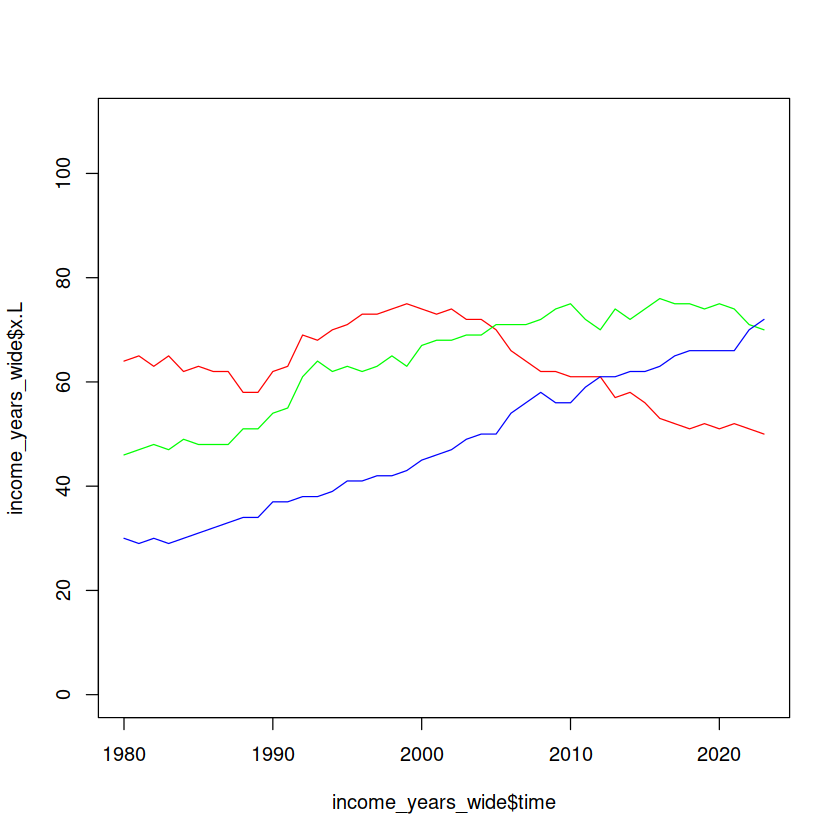

In [70]:
plot(x = income_years_wide$time, y = income_years_wide$x.L, col = "red", type = "l", ylim = c(0, 110))
lines(x = income_years_wide$time, income_years_wide$x.M, col = "green")
lines(x = income_years_wide$time, income_years_wide$x.H, col = "blue")

Over the last decade, while number of middle-income countries was stable, number of high-income countries increased and number of low-income countries decreased

Since LI countries cannot promote to HI countries directly, this can be interpreted as the number of countries promoted from MI to HI is more or less equal to countries promoted from LI to MI 

### Average foreign asset and foreign liabilities

In [71]:
weo_iip_2016_I2

    WEO.Country.Code ISO.x Country.x              NGDP_R     NGDP_RPCH
1   111              USA   United States           17659.200  1.567   
2   112              GBR   United Kingdom           1969.524  1.789   
3   122              AUT   Austria                   317.149  1.451   
4   124              BEL   Belgium                   416.085  1.412   
5   126              NA    NA                             NA     NA   
6   128              DNK   Denmark                  1954.500  1.967   
7   132              FRA   France                   2197.260  1.103   
8   134              DEU   Germany                  2859.180  2.157   
9   135              SMR   San Marino                  1.232  2.197   
10  136              ITA   Italy                    1570.980  0.858   
11  137              LUX   Luxembourg                 47.724  3.083   
12  138              NLD   Netherlands               705.131  2.192   
13  142              NOR   Norway                   3152.148  1.091   
14  14

In [72]:
names(weo_iip_2016_I2)

 [1] "WEO.Country.Code"                                                        
 [2] "ISO.x"                                                                   
 [3] "Country.x"                                                               
 [4] "NGDP_R"                                                                  
 [5] "NGDP_RPCH"                                                               
 [6] "NGDP"                                                                    
 [7] "NGDPD"                                                                   
 [8] "PPPGDP"                                                                  
 [9] "NGDP_D"                                                                  
[10] "NGDPRPC"                                                                 
[11] "NGDPRPPPPC.x"                                                            
[12] "NGDPPC"                                                                  
[13] "NGDPDPC"                          

In [73]:
str(weo_iip_2016_I2)

'data.frame':	213 obs. of  65 variables:
 $ WEO.Country.Code                                                        : int  111 112 122 124 126 128 132 134 135 136 ...
 $ ISO.x                                                                   : Factor w/ 194 levels "ABW","AFG","AGO",..: 183 61 10 13 NA 47 58 44 155 84 ...
 $ Country.x                                                               : Factor w/ 194 levels "Afghanistan",..: 186 185 10 16 NA 44 58 62 145 81 ...
 $ NGDP_R                                                                  : num  17659 1970 317 416 NA ...
 $ NGDP_RPCH                                                               : num  1.57 1.79 1.45 1.41 NA ...
 $ NGDP                                                                    : num  18707 1970 353 423 NA ...
 $ NGDPD                                                                   : num  18707 2669 391 468 NA ...
 $ PPPGDP                                                                  : num  18707 282

Now three columns will be selected:

- Assets
- Direct.investment (in assets)
- Liabilities
- Direct.investment.1 (in liabilities)
- Net.international.investment.position

and they will be divided by GDP in USD (NGDPD) and the mean values for each income level will be found:

In [74]:
weo_iip_2016_I3 <- weo_iip_2016_I2[,c("Assets", "Direct.investment", "Liabilities",
                                      "Direct.investment.1",
                                      "Net.international.investment.position")] /
                                        weo_iip_2016_I2$NGDPD / 1000 * 100

iip_level <- aggregate(weo_iip_2016_I3,
                          by = list(weo_iip_2016_I2$income_levels),
                          FUN = function(x) round(mean(x, na.rm = T), 2))

In [75]:
iip_level

  Group.1 Assets Direct.investment Liabilities Direct.investment.1
1 L        49.16   5.02             95.12       44.07             
2 M       133.23  43.03            165.07       91.07             
3 H       697.68 306.67            698.96      319.11             
  Net.international.investment.position
1 -45.96                               
2 -31.85                               
3  -1.28                               

In low income countries net international investment position to GDP rations are highly negative and only a small portion of international assets is direct investments abroad. Total international investment openness is to a limited degree

In high income countries, international investment position to GDP ratio is close to zero, however openness is extremely high: international assets is 7 times the GDP. Nearly half of international assets is of direct investment form and considering the sizes of their economies, the direct investment as assets and liabilities of high income countries must match each other (so they mostly invest in other high income countries)

## Data science exercise

Starting with the raw data and the objects already created we will end up with highly refined summary insights on global economic data in 11 steps

### Step 1

For those variables:

- NGDP_RPCH: Gross domestic product, constant prices, Percent change
- NID_NGDP: Total investment percent of GDP
- NGSD_NGDP: Gross national savings percent of GDP
- LUR: Unemployment rate
- GGXONLB_NGDP: General government primary net lending/borrowing, Percent of GDP
- BCA_NGDPD: Current account balance, Percent of GDP

Filter the weo dataset and save as weo_sub (first a create a vector of those variable names and filter WEO.Subject.Code column for them)

### Step 2

Using the cols object from the ppp melting example, melt all years values in weo_sub into a long DF named weo_sub_long. WEO.Subject.Code and Subject.Descriptor should also be kept along with Country codes and names

Keep only:

- WEO.Country.Code
- ISO
- WEO.Subject.Code
- Country
- Subject.Descriptor
- time
- value
in weo_sub_long_2

Clear rownames and convert year values from X1980 to 1980 and make them numeric:

### Step 3

Cast the selected variables into columns using WEO.Subject.Code as column names. Drop "WEO.Subject.Code"

"WEO.Country.Code", "Country", "time" variables will be kept on rows

Correct the column names of:

value.NGDP_RPCH	value.NID_NGDP	value.NGSD_NGDP	value.LUR	value.GGXONLB_NGDP	value.BCA_NGDPD

bu deleting "value."

Name of wide DF should be weo_sub_wide

### Step 4

Select WEO.Country.Code, time and income_levels columns from weo_ppp_long_2 into  weo_ppp_long_3

Using WEO.Country.Code and time columns, join weo_sub_wide to selected columns of weo_ppp_long_3. Use inner join. Make the new object weo_sub_wide_2

### Step 5

Excluding WEO.Country.Code, ISO and	Country variables	

for each of the:

- NGDP_RPCH
- NID_NGDP
- NGSD_NGDP
- LUR
- GGXONLB_NGDP
- BCA_NGDPD

variables, find the median values across years and income levels and save into medians. remove na's in median calculation

### Step 6

left join weo_sub_wide_2 and medians into weo_sub_wide_3 using time and income_levels

### Step 7

Create a new DF weo_sub_wide_4 which includes:

income_levels, time, WEO.Country.Code, ISO and Country columns as is but:

for each of:

- NGDP_RPCH
- NID_NGDP
- NGSD_NGDP
- LUR
- GGXONLB_NGDP
- BCA_NGDPD

The difference between x and y columns will be taken (abnormal values above respective medians)

To prevent having to use the weo_sub_wide_3 object name multiple times use the with function as such:

```R
with(weo_sub_wide_3, data.frame(NGDP_RPCH = NGDP_RPCH.x - NGDP_RPCH.y))
```

### Step 8

Discretize NGDP_RPCH where positive values will be "fast", zero or negative values will be slow

Include this as a new column named GDP_speed into weo_sub_wide_4

You can use the with() function again

### Step 9

For each time and GDP_speed get the median values for all:

- NGDP_RPCH
- NID_NGDP
- NGSD_NGDP
- LUR
- GGXONLB_NGDP
- BCA_NGDPD

variables. Save into fast_vs_slow

### Step 10

Aggregate fast_vs_slow by decades and GDP_speed using median, sort first by decades and then by GDP_speed 

first add a decade column to fast_vs_slow

save in to fast_vs_slow_decade

### Step 11

For those variables:

- NGDP_RPCH: Gross domestic product, constant prices, Percent change
- NID_NGDP: Total investment percent of GDP
- NGSD_NGDP: Gross national savings percent of GDP
- LUR: Unemployment rate
- GGXONLB_NGDP: General government primary net lending/borrowing, Percent of GDP
- BCA_NGDPD: Current account balance, Percent of GDP

With lapply, create a DF for each variable:

- First column is decade
- Second column is values for slow's
- Third column is values for fast's

Round to 1 decimal place

**NOW THE END: Interpret the meaning**